### Exercício: Adaline e Perceptron


Dado os seguintes dados de treinamento, onde o valor entre parênteses é a coordenada e o "1" ou "-1" é a resposta desejada:

    (-0.67, 0.51), 1
    (1.13, 1.34), 1
    (-0.63, -0.02), 1
    (0.10, -1.35), -1
    (0.88, -1.09), -1
    (0.94, 0.61), -1
    (-1.06, -1.13), -1
    (-0.85, -0.34), 1
    (-0.38, -0.29), 1
    (0.18, -0.72), -1
    (0.24, -0.08), 1
    (-0.80, -0.31), 1
    (0.25, 0.36), 1
    (-1.19, -0.61), 1
    (0.78, 1.05), 1
    (0.46, -0.19), -1
    (-0.12, 0.56), 1
    (1.52, 1.69), 1
    (0.84, -0.68), -1
    (-1.16, -0.73), 1

Treine as redes Adaline e Perceptron para resolver esse problema. Depois teste com o seguinte conjunto de dados:

    (-0.91, 1.26), 1
    (-1.06, 1.20), 1
    (0.16, 0.80), 1
    (-1.07, 1.82), 1
    (0.07, 0.12), 1
    (1.33, -0.13), -1


Dica: Use  $η=0.01$ nos dois, 1000 épocas no perceptron e um critério de parada de $10^-3$ (1e-3) no Adaline


#### Código Adaline (não precisa alterar)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class Adaline:
    
    def __init__(self, lr, e):
        '''Construtor, define taxa de aprendizado e a taxa de erro aceita para convergir'''
        self.lr = lr
        self.e = e
    def activation(self, value):
        ''' 1 se value > 0, -1 senão'''
        return (1 if value >= 0 else -1)
        
    def predict(self, x):
        ''' Multiplicação matricial entre as entradas e os pesos somado ao bias proporcional'''
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        ''' Calcula a diferença entre o valor real e o valor predito'''
        return (target - predicted)
    
    def train(self, x, d):
        ''' Definir aleatoriamente os pesos, o bias e o peso do bias
            Enquanto a diferença entre m mse_anterior e o mse_atual for maior que 'e' continua o processo 
        '''
        self.weights = np.random.random(x.shape[1])
        self.bias = -1
        self.w_bias = np.random.random()
        
        epoch = 0
        self.total_mse = []
        last_mse = np.inf
        
        
        while True:
            mse = 0
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)  
                current_error = self.evaluate(target, predicted)
                mse += (current_error ** 2)
                self.weights += self.lr * current_error * xi
                self.w_bias += self.lr * current_error * self.bias
                
            mse = (mse/len(x))
            print(f"EPOCH: {epoch}\t- MSE: {mse}\t- MSE_ant - MSE: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch +=1
            
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

#### Código Perceptron (não precisa alterar)

In [13]:
class Perceptron:
    
    def __init__(self, lr, n_epochs):
        '''Construtor, define taxa de aprendizado e número máximo de épocas'''
        self.lr = lr
        self.n_epochs = n_epochs
        
    def activation(self, value):
        ''' 1 se value > 0, -1 se value < 0, 0 se value == 0 '''
        return (1 if value > 0 else -1 if value < 0 else 0)
        
    def predict(self, x):
        ''' Multiplicação matricial entre as entradas e os pesos somado ao bias proporcional'''
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        ''' Calcula a diferença entre o valor real e o valor predito'''
        return (target - predicted)
    
    def train(self, x, d):
        ''' Definir aleatoriamente os pesos, o bias e o peso do bias
            Enquanto houver erro, ou o máximo de épocas não for atingido continua o processo
            
        '''
        self.weights = np.random.random(x.shape[1])
        self.bias = np.random.random()
        self.w_bias = np.random.random()
        
        epoch = 0
        is_error = True
        self.total_error = []
        
        while is_error and epoch < self.n_epochs:
            
            is_error  = False
            epoch_errors = 0
            
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)
                predicted = self.activation(predicted)
                
                current_error = self.evaluate(target, predicted)
                epoch_errors += current_error
                
                # Se houve erro, atualizar os pesos
                if predicted != target:
                    
                    self.weights += self.lr * current_error * xi
                    self.w_bias += self.lr * current_error * self.bias
                    is_error = True
                    
            self.total_error.append(epoch_errors/len(x))
            epoch += 1
            
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

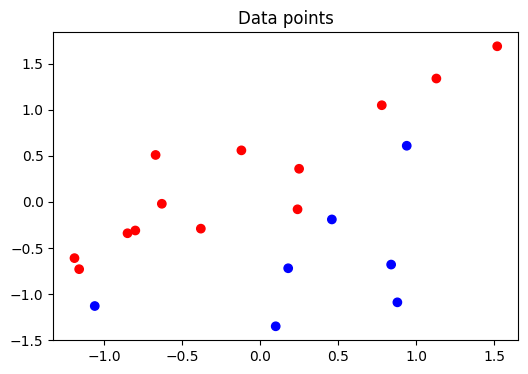

In [5]:
# Dataset
x = np.array([
    [-0.67, 0.51],
    [1.13, 1.34],
    [-0.63, -0.02],
    [0.10, -1.35],
    [0.88, -1.09],
    [0.94, 0.61],
    [-1.06, -1.13],
    [-0.85, -0.34],
    [-0.38, -0.29],
    [0.18, -0.72],
    [0.24, -0.08],
    [-0.80, -0.31],
    [0.25, 0.36],
    [-1.19, -0.61],
    [0.78, 1.05],
    [0.46, -0.19],
    [-0.12, 0.56],
    [1.52, 1.69],
    [0.84, -0.68],
    [-1.16, -0.73]
])

d = np.array([1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1])

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

#### Treinamento

#### Teste